In [1]:
import numpy as np
import matplotlib as plt
from scipy.optimize import root
from planning_algorithms import *
from util import *

In [2]:
# define path to follow
Np = 8
xp = np.vstack((np.linspace(-1.5, 1.5, Np), np.ones(Np) * 1.0)).T

# calulate inital configuration
q0_guess = np.array([np.pi / 2, np.pi / 4])
x0 = xp[0, :]
res = newton(x0, q0_guess)
q0 = res['q']

# ik for last point, needed for taylors algorithm
sol = root(lambda q : xp[-1, :] - fk(q), q0)
qN = sol['x']

# plot initial configuration
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[:, 0], xp[:, 1], 'go')
x2, x1 = fk(q0, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
x2, x1 = fk(qN, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
#plt.show()

## Inverse kinematics for every path point

In [3]:
qp1 = exact_ik(xp, q0)
#print qp1

In [4]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 1.5])

# plot solution configurations
for i in range(Np):
    x2, x1 = fk(qp1[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'go')
#plt.show()

## Linear interpolation in join space (Taylor's algorithm)

In [5]:
# In this case we don't use the path, only the first and the last point
# We do need the ik solution for the last point (qN)
d = 0.1 # acceptable deviation from path
qp2, xp2 = taylor_interpolation(xp[0], xp[-1], q0, qN, d)
#print qp2

In [6]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 1.5])

# plot solution configurations
for i in range(len(qp2)):
    x2, x1 = fk(qp2[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'g--')

# allowed deviation
plt.plot(xp[:, 0], xp[:, 1] - d, 'r-.')
plt.plot(xp[:, 0], xp[:, 1] + d, 'r-.')
#plt.show()

## Local optimization of joint movement

In [3]:
d = 0.1
qp3, xp3 = local_optimization(xp, q0, d)

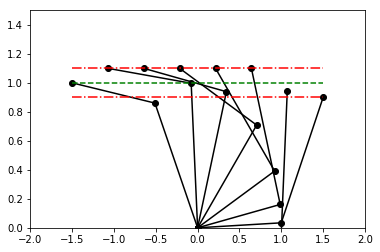

In [6]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 1.5])

# plot solution configurations
for i in range(len(qp3)):
    x2, x1 = fk(qp3[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'g--')

# allowed deviation
plt.plot(xp[:, 0], xp[:, 1] - d, 'r-.')
plt.plot(xp[:, 0], xp[:, 1] + d, 'r-.')
plt.show()